Here, I am using scikit-learn to determine which of the two predictor columns I selected in the previous Week 13 Assignment are a better predictor of whether a mushroom is poisonous or not.

In [44]:
# Let's import the data and put it in a df, and take the subset we took from last assignment
import pandas as pd
columns = [
    "class", "cap_shape", "cap_surface", "cap_color", "bruises", "odor", "gill_attachment",
    "gill_spacing", "gill_size", "gill_color", "stalk_shape", "stalk_root", "stalk_surface_above_ring",
    "stalk_surface_below_ring", "stalk_color_above_ring", "stalk_color_below_ring", "veil_type",
    "veil_color", "ring_number", "ring_type", "spore_print_color", "population", "habitat"
]
df = pd.read_csv("~/is362/Week 13 Assignment/mushroom.csv", header=None, names=columns)
df_subset = df[['class', 'odor', 'cap_color']]
df_subset.loc[:, 'class'] = df_subset['class'].map({'e': 0, 'p': 1})
df_subset.loc[:, 'odor'] = df_subset['odor'].astype('category').cat.codes
df_subset.loc[:, 'cap_color'] = df_subset['cap_color'].astype('category').cat.codes
print(df_subset.head())

  class odor cap_color
0     1    6         4
1     0    0         9
2     0    3         8
3     1    6         8
4     0    5         3


Step 1: One-Hot encoding for the categorical variables to turn them into binary (important for machine learning algorithms).

In [45]:
df_encoded = pd.get_dummies(df_subset, columns=['odor', 'cap_color'], drop_first=True)
print(df_encoded.head())

  class  odor_1  odor_2  odor_3  odor_4  odor_5  odor_6  odor_7  odor_8  \
0     1   False   False   False   False   False    True   False   False   
1     0   False   False   False   False   False   False   False   False   
2     0   False   False    True   False   False   False   False   False   
3     1   False   False   False   False   False    True   False   False   
4     0   False   False   False   False    True   False   False   False   

   cap_color_1  cap_color_2  cap_color_3  cap_color_4  cap_color_5  \
0        False        False        False         True        False   
1        False        False        False        False        False   
2        False        False        False        False        False   
3        False        False        False        False        False   
4        False        False         True        False        False   

   cap_color_6  cap_color_7  cap_color_8  cap_color_9  
0        False        False        False        False  
1        False  

Success!

Step 2: Split the data into predictor variables (odor, cap color) and target variable (poisonous or not).

In [46]:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

Step 3: Divide data into a training set to train the model and a test set to evaluate the model's performance.

In [47]:
from sklearn.model_selection import train_test_split

# test_size = 0.3 means 30% of the dataset will be used to test, random_state integer doesn't matter just enures reproducibility, 42 is used as a joke apparently lol.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

Step 4: Let's train the model now using a random forest classifier, which (supposedly) handles categorical predictors (such as odor and cap color) very well, can handle non linear relationships (if they exist in the dataset) and mitigates overfitting.

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Train model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Step 5: Let's make predictions on the test set and evaluate the model's accuracy.

In [49]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy of the model based on the rest of the data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9869


Great! The model seems accurate.

Step 6: Let's generate a classification report that evaluates precision (of the mushrooms PREDICTED as poisonous, how many are TRULY poisonous?), recall (of the mushrooms that are TRULY poisonous, how many were CORRECTLY PREDICTED as poisonous), and F-1 score which is a score combining of these two metrics.

In [50]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.97      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



Step 7: Let's generate a confusion matrix to show true positives, true negatives, false positives, and false negatives.

In [51]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1257    0]
 [  32 1149]]


The above confusion matrix tells me that there were 1149 true positives (predicted poisonous, actually poisonous), 1257 true negatives (predicted safe, actually safe), 0 false positives (predicted poisonous, actually safe), and 32 false negatives (predicted safe, actually poisonous). This is reflected by the precision scores where 100% of the mushrooms predicted as poisonous were truly poisonous. However, 98% of the mushrooms predicted as safe were truly safe. Read that again...

In short, this model works great at identifying poisonous mushrooms but I would not take my chances with identifying safe mushrooms since it is wrong 2% of the time. And I have no use in this model being 100% precise when identifying poisonous mushrooms because I am not eating them...

Let's now figure out which features are most predictive.

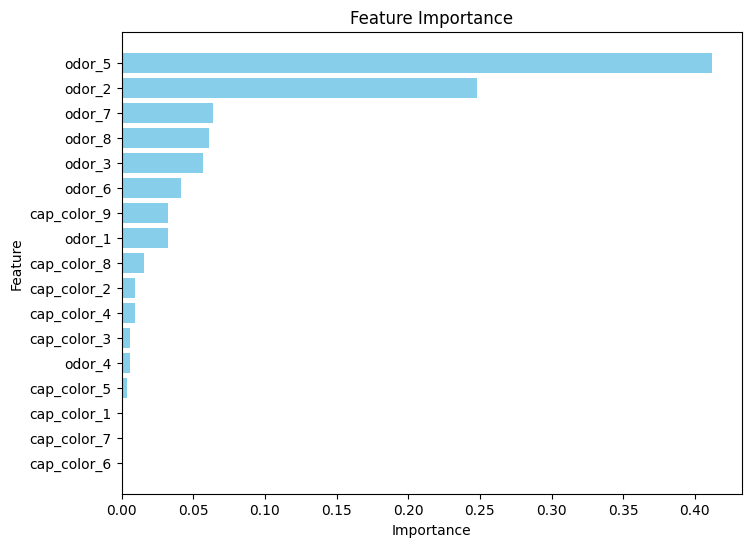

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = rf_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
# Plot
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Seems that odor tends to predominate for the model and is the more important predictor for poisonous mushrooms. For future analysis, perhaps a larger model that incorporates the entire dataset could be used. That way, we could have a model that will help us identify with 100% precision which mushrooms are safe to eat! As it stands, while the model is AMAZING, I will not trust it with my life :)